# BANA-212 Final Project Analysis Notebook

**Student:** Berry

**Date:** December 6, 2025

**Course:** BANA-212

**Purpose:** This notebook conducts a complete end-to-end analysis of Reddit sentiment data and stock market performance for TSLA, AAPL, MSFT, and SPY from 2022-2025. The analysis includes exploratory data analysis, feature engineering, regression modeling (predicting next-day returns), and classification modeling (predicting price direction).

## 1. Imports & Configuration

In [1]:
# Standard libraries
import pandas as pd  ## Import pandas library for data manipulation and analysis
import numpy as np  ## Import numpy library for numerical computing
import os  ## Import os module for operating system operations like file paths
import warnings  ## Import warnings module to control warning messages
warnings.filterwarnings('ignore')  ## Suppress all warning messages for cleaner output

# Visualization
import matplotlib.pyplot as plt  ## Import matplotlib for creating visualizations
import seaborn as sns  ## Import seaborn for statistical data visualization
plt.style.use('seaborn-v0_8-darkgrid')  ## Set the visual style for all matplotlib plots
sns.set_palette('husl')  ## Set the color palette for seaborn plots

# Machine Learning
from sklearn.model_selection import train_test_split  ## Import train/test split function from scikit-learn
from sklearn.linear_model import LinearRegression, LogisticRegression  ## Import linear model algorithms from scikit-learn
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  ## Import ensemble learning algorithms from scikit-learn
from sklearn.metrics import (  ## Import performance evaluation metrics from scikit-learn
    r2_score, mean_absolute_error, mean_squared_error,  ## Execute this line of code
    accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc  ## Execute this line of code
)  ## Execute this line of code

# Project Configuration
BASE_DIR = "/Users/BerryMonsturr/Desktop/BANA-212-Final-Project"  ## Define the base directory path where all project files are stored
DATA_FILE = os.path.join(BASE_DIR, "merged_final_dataset.csv")  ## Combine directory and filename to create full path to the dataset

# Create output directories
os.makedirs(os.path.join(BASE_DIR, "figures"), exist_ok=True)  ## Create figures directory if it doesn't exist
os.makedirs(os.path.join(BASE_DIR, "model_outputs"), exist_ok=True)  ## Create model_outputs directory if it doesn't exist
os.makedirs(os.path.join(BASE_DIR, "eda_outputs"), exist_ok=True)  ## Create eda_outputs directory if it doesn't exist

print("✓ All imports successful")  ## Display confirmation message that all libraries loaded successfully
print(f"✓ Base directory: {BASE_DIR}")  ## Display the base directory path
print(f"✓ Data file: {DATA_FILE}")  ## Display the full path to the data file


✓ All imports successful
✓ Base directory: /Users/BerryMonsturr/Desktop/BANA-212-Final-Project
✓ Data file: /Users/BerryMonsturr/Desktop/BANA-212-Final-Project/merged_final_dataset.csv


## 2. Load Dataset

In [2]:
# Load the merged dataset
df = pd.read_csv(DATA_FILE)  ## Read the CSV file and load it into a pandas DataFrame
df['Date'] = pd.to_datetime(df['Date'])  ## Convert the Date column from string to datetime data type

print("Dataset Shape:", df.shape)  ## Display the number of rows and columns in the dataset
print("\nColumns:")  ## Print a header for the column list
print(df.columns.tolist())  ## Execute this line of code
print("\nData Types:")  ## Print a header for data types
print(df.dtypes)  ## Display the data type of each column
print("\nFirst 5 rows:")  ## Print a header for the first rows
display(df.head())  ## Show the first 5 rows of the dataset
print("\nLast 5 rows:")  ## Print a header for the last rows
display(df.tail())  ## Show the last 5 rows of the dataset


Dataset Shape: (3848, 25)

Columns:
['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Symbol', 'Capital Gains', 'mean_sentiment', 'total_score', 'total_comments', 'post_count', 'Return_0D', 'Return_1D', 'Direction', 'engagement', 'has_reddit_data', 'abs_sentiment', 'sentiment_strength', 'sentiment_z', 'symbol_id', 'rolling_mean_5d', 'rolling_vol_5d']

Data Types:
Date                  datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                         int64
Dividends                    float64
Stock Splits                   int64
Symbol                        object
Capital Gains                float64
mean_sentiment               float64
total_score                    int64
total_comments                 int64
post_count                     int64
Return_0D                    float64
Return_1D                    float64
Direction  

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Capital Gains,...,Return_1D,Direction,engagement,has_reddit_data,abs_sentiment,sentiment_strength,sentiment_z,symbol_id,rolling_mean_5d,rolling_vol_5d
0,2022-01-03,174.176187,179.122429,174.058657,178.270294,104487900,0.0,0,AAPL,NaN,...,-0.012691,0,0,0,0.0,0.0,0.000000,0,178.270294,NaN
1,2022-01-03,324.478993,327.043083,319.089548,323.898438,28865100,0.0,0,MSFT,NaN,...,-0.017147,0,0,0,0.0,0.0,-0.032241,1,323.898438,NaN
2,2022-01-03,451.872667,453.343192,449.548334,453.210358,72668200,0.0,0,SPY,0.0,...,-0.000335,0,0,0,0.0,0.0,0.000000,2,453.210358,NaN
3,2022-01-03,382.583344,400.356659,378.679993,399.926666,103931400,0.0,0,TSLA,NaN,...,-0.041833,0,0,0,0.0,0.0,-0.073133,3,399.926666,NaN
4,2022-01-04,178.877604,179.181232,175.439712,176.007797,99310400,0.0,0,AAPL,NaN,...,-0.026600,0,0,0,0.0,0.0,0.000000,0,177.139046,NaN



Last 5 rows:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Capital Gains,...,Return_1D,Direction,engagement,has_reddit_data,abs_sentiment,sentiment_strength,sentiment_z,symbol_id,rolling_mean_5d,rolling_vol_5d
3843,2025-10-30,451.049988,455.059998,439.609985,440.100006,72447900,0.0,0,TSLA,NaN,...,0.037401,1,566,1,0.9651,-0.9651,-11.063296,3,449.660004,0.036859
3844,2025-10-31,276.721738,277.051436,268.899335,270.108154,86167100,0.0,0,AAPL,NaN,...,NaN,0,0,0,0.0000,0.0000,0.000000,0,269.594647,0.010212
3845,2025-10-31,527.891978,528.331159,514.137692,516.842651,34006400,0.0,0,MSFT,NaN,...,NaN,0,0,0,0.0000,0.0000,-0.032241,1,530.748657,0.020498
3846,2025-10-31,685.039978,685.080017,679.239990,682.059998,87164100,0.0,0,SPY,0.0,...,NaN,0,0,0,0.0000,0.0000,0.000000,2,684.316003,0.008182
3847,2025-10-31,446.750000,458.000000,443.690002,456.559998,83135800,0.0,0,TSLA,NaN,...,NaN,0,129,1,0.1280,0.1280,1.384479,3,454.228003,0.035882


## 3. Data Quality Checks

In [3]:
# Missing values analysis
missing = df.isnull().sum()  ## Calculate the count of missing values for each column
missing_pct = (missing / len(df)) * 100  ## Calculate the percentage of missing values for each column
missing_df = pd.DataFrame({  ## Create a DataFrame to store missing value statistics
    'Missing Count': missing,  ## Execute this line of code
    'Percentage': missing_pct  ## Execute this line of code
}).sort_values('Missing Count', ascending=False)  ## Sort the DataFrame by the specified column

print("Missing Values Summary:")  ## Print a header for missing values summary
display(missing_df[missing_df['Missing Count'] > 0])  ## Display the missing values summary table

# Summary statistics
print("\nSummary Statistics:")  ## Print a header for summary statistics
display(df.describe())  ## Show descriptive statistics for all numeric columns

# Ticker distribution
print("\nTicker Distribution:")  ## Print a header for ticker distribution
print(df['Symbol'].value_counts())  ## Display the count of rows for each stock ticker

# Date range
print(f"\nDate Range: {df['Date'].min()} to {df['Date'].max()}")  ## Print a header for date range
print(f"Total Days: {(df['Date'].max() - df['Date'].min()).days}")  ## Print a header for total days calculation

# Reddit coverage by ticker
print("\nReddit Coverage by Ticker:")  ## Print a header for Reddit coverage analysis
reddit_coverage = df.groupby('Symbol')['has_reddit_data'].agg(['sum', 'count', 'mean'])  ## Group data by ticker and aggregate Reddit data availability
reddit_coverage.columns = ['Days with Reddit Data', 'Total Days', 'Coverage %']  ## Rename the columns of the Reddit coverage DataFrame
reddit_coverage['Coverage %'] = (reddit_coverage['Coverage %'] * 100).round(1)  ## Calculate the percentage of days with Reddit data
display(reddit_coverage)  ## Show the Reddit coverage summary table


Missing Values Summary:


,Missing Count,Percentage
Capital Gains,2886,75.00000
rolling_vol_5d,8,0.20790
Return_1D,4,0.10395
Return_0D,4,0.10395



Summary Statistics:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,mean_sentiment,...,Return_1D,Direction,engagement,has_reddit_data,abs_sentiment,sentiment_strength,sentiment_z,symbol_id,rolling_mean_5d,rolling_vol_5d
count,3848,3848.000000,3848.000000,3848.000000,3848.000000,3.848000e+03,3848.00000,3848.000000,962.0,3848.000000,...,3844.000000,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3.848000e+03,3848.000000,3848.000000,3840.000000
mean,2023-12-02 14:20:42.411642368,320.752563,324.251731,317.088052,320.790524,6.815575e+07,0.01035,0.000780,0.0,0.001825,...,0.000657,0.525208,3.513254,0.006757,0.002833,0.004296,3.898130e-11,1.500000,320.482958,0.018924
min,2022-01-03 00:00:00,103.000000,111.750000,101.809998,108.099998,7.164500e+06,0.00000,0.000000,0.0,-0.965100,...,-0.154262,0.000000,0.000000,0.000000,0.000000,-0.965100,-1.106330e+01,0.000000,112.981998,0.000770
25%,2022-12-15 00:00:00,210.127598,213.663824,207.085465,210.255341,3.690375e+07,0.00000,0.000000,0.0,0.000000,...,-0.008955,0.000000,0.000000,0.000000,0.000000,0.000000,-3.224129e-02,0.750000,210.429182,0.008750
50%,2023-11-30 12:00:00,290.497524,295.688780,284.637788,290.316666,6.362640e+07,0.00000,0.000000,0.0,0.000000,...,0.000732,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.500000,290.283505,0.014137
75%,2024-11-14 00:00:00,415.697389,418.961252,411.577022,415.120155,8.937392e+07,0.00000,0.000000,0.0,0.000000,...,0.010393,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.250000,415.600584,0.024545
max,2025-10-31 00:00:00,688.719971,689.700012,684.830017,687.390015,3.186799e+08,1.96600,3.000000,0.0,0.989700,...,0.226900,1.000000,2237.000000,1.000000,0.989700,2.581600,3.098388e+01,3.000000,684.316003,0.132823
std,NaN,133.558237,133.629386,133.286070,133.510067,4.045571e+07,0.11572,0.048362,0.0,0.046032,...,0.023992,0.499429,58.153770,0.081932,0.045981,0.091015,7.068310e-01,1.118179,133.087375,0.014869



Ticker Distribution:
Symbol
AAPL    962
MSFT    962
SPY     962
TSLA    962
Name: count, dtype: int64

Date Range: 2022-01-03 00:00:00 to 2025-10-31 00:00:00
Total Days: 1397

Reddit Coverage by Ticker:


,Days with Reddit Data,Total Days,Coverage %
Symbol,,,
AAPL,0,962,0.0
MSFT,1,962,0.1
SPY,0,962,0.0
TSLA,25,962,2.6


## 4. Exploratory Data Analysis (EDA)

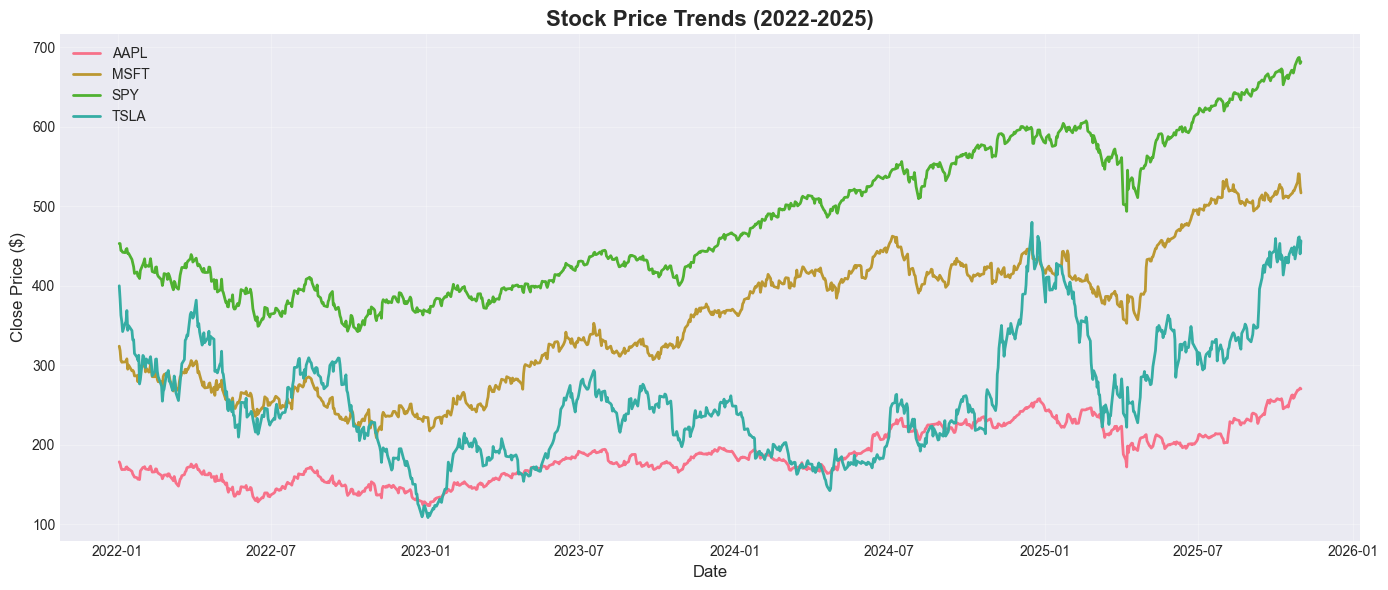

✓ Saved: price_trends.png


In [4]:
# Plot 1: Close price trends by ticker
fig, ax = plt.subplots(figsize=(14, 6))  ## Create a new figure and axis object for plotting
for ticker in df['Symbol'].unique():  ## Loop through each unique stock ticker
    ticker_data = df[df['Symbol'] == ticker]  ## Filter the DataFrame to get data for the current ticker
    ax.plot(ticker_data['Date'], ticker_data['Close'], label=ticker, linewidth=2)  ## Plot the data for the current ticker
ax.set_title('Stock Price Trends (2022-2025)', fontsize=16, fontweight='bold')  ## Set the title of the plot
ax.set_xlabel('Date', fontsize=12)  ## Set the label for the x-axis
ax.set_ylabel('Close Price ($)', fontsize=12)  ## Set the label for the y-axis
ax.legend()  ## Display the legend on the plot
ax.grid(True, alpha=0.3)  ## Add a grid to the plot
plt.tight_layout()  ## Automatically adjust subplot parameters for better layout
plt.savefig(os.path.join(BASE_DIR, 'figures', 'price_trends.png'), dpi=300, bbox_inches='tight')  ## Save the current figure to a file
plt.show()  ## Display the plot on screen
print("✓ Saved: price_trends.png")  ## Print a confirmation message that the file was saved


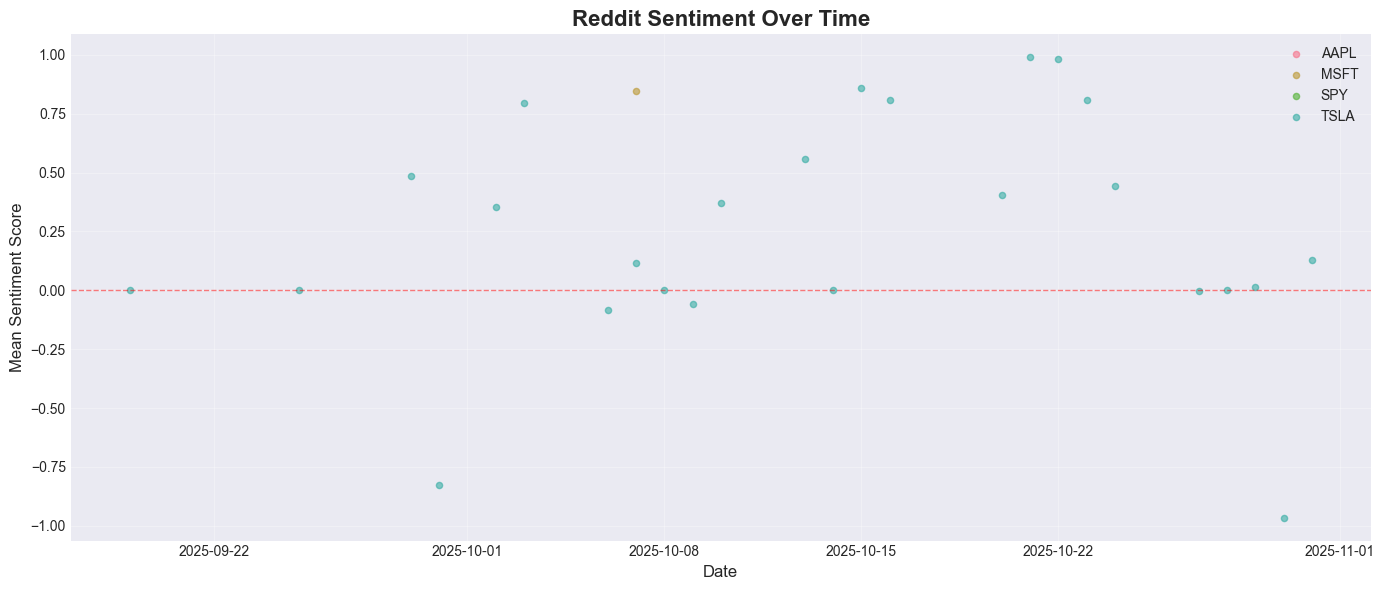

✓ Saved: sentiment_over_time.png


In [5]:
# Plot 2: Sentiment over time
fig, ax = plt.subplots(figsize=(14, 6))  ## Create a new figure and axis object for plotting
for ticker in df['Symbol'].unique():  ## Loop through each unique stock ticker
    ticker_data = df[(df['Symbol'] == ticker) & (df['has_reddit_data'] == 1)]  ## Assign value to ticker_data
    ax.scatter(ticker_data['Date'], ticker_data['mean_sentiment'], label=ticker, alpha=0.6, s=20)  ## Assign value to ax.scatter(ticker_data['Date'], ticker_data['mean_sentiment'], label
ax.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)  ## Assign value to ax.axhline(y
ax.set_title('Reddit Sentiment Over Time', fontsize=16, fontweight='bold')  ## Set the title of the plot
ax.set_xlabel('Date', fontsize=12)  ## Set the label for the x-axis
ax.set_ylabel('Mean Sentiment Score', fontsize=12)  ## Set the label for the y-axis
ax.legend()  ## Display the legend on the plot
ax.grid(True, alpha=0.3)  ## Add a grid to the plot
plt.tight_layout()  ## Automatically adjust subplot parameters for better layout
plt.savefig(os.path.join(BASE_DIR, 'figures', 'sentiment_over_time.png'), dpi=300, bbox_inches='tight')  ## Save the current figure to a file
plt.show()  ## Display the plot on screen
print("✓ Saved: sentiment_over_time.png")  ## Print a confirmation message that the file was saved


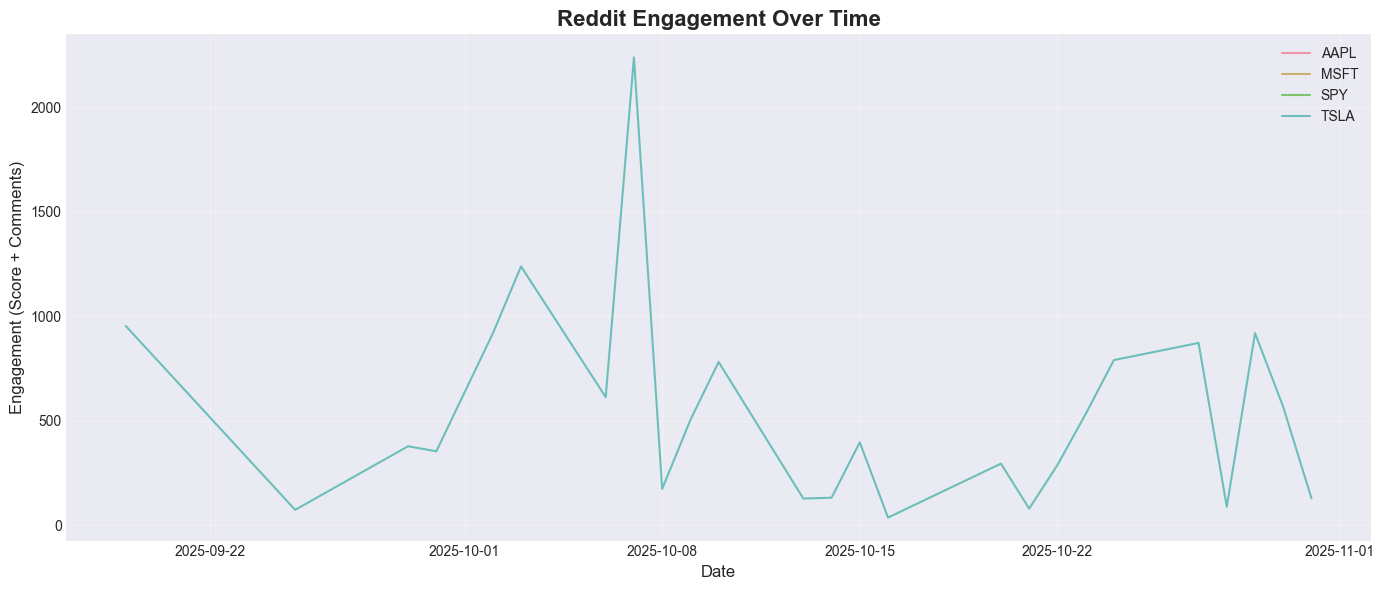

✓ Saved: engagement_over_time.png


In [6]:
# Plot 3: Engagement over time
fig, ax = plt.subplots(figsize=(14, 6))  ## Create a new figure and axis object for plotting
for ticker in df['Symbol'].unique():  ## Loop through each unique stock ticker
    ticker_data = df[(df['Symbol'] == ticker) & (df['has_reddit_data'] == 1)]  ## Assign value to ticker_data
    ax.plot(ticker_data['Date'], ticker_data['engagement'], label=ticker, alpha=0.7)  ## Plot the data for the current ticker
ax.set_title('Reddit Engagement Over Time', fontsize=16, fontweight='bold')  ## Set the title of the plot
ax.set_xlabel('Date', fontsize=12)  ## Set the label for the x-axis
ax.set_ylabel('Engagement (Score + Comments)', fontsize=12)  ## Set the label for the y-axis
ax.legend()  ## Display the legend on the plot
ax.grid(True, alpha=0.3)  ## Add a grid to the plot
plt.tight_layout()  ## Automatically adjust subplot parameters for better layout
plt.savefig(os.path.join(BASE_DIR, 'figures', 'engagement_over_time.png'), dpi=300, bbox_inches='tight')  ## Save the current figure to a file
plt.show()  ## Display the plot on screen
print("✓ Saved: engagement_over_time.png")  ## Print a confirmation message that the file was saved


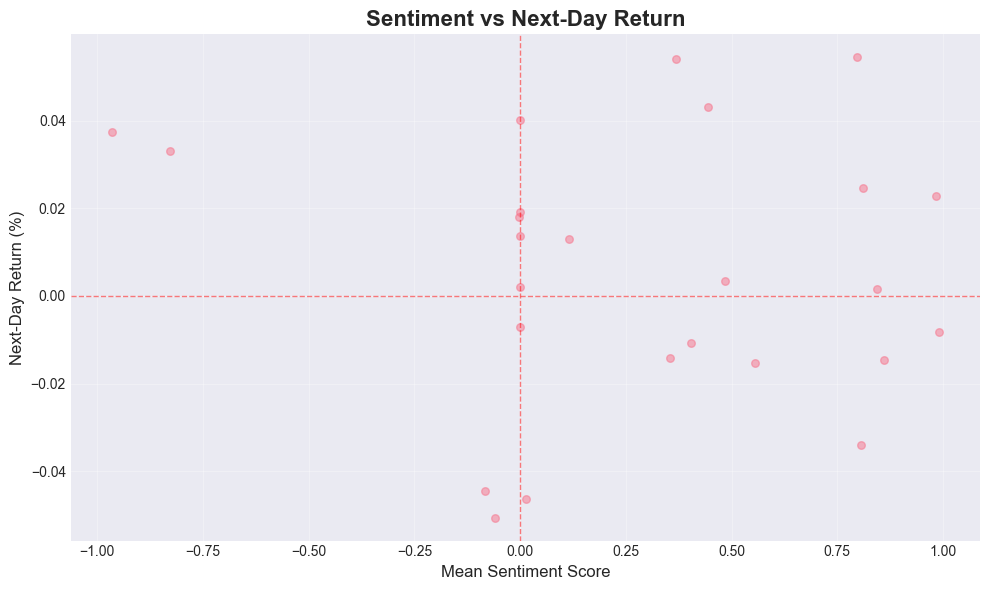

✓ Saved: sentiment_vs_return.png


In [7]:
# Plot 4: Sentiment vs Next-Day Return
reddit_data = df[df['has_reddit_data'] == 1].dropna(subset=['Return_1D'])  ## Assign value to reddit_data
fig, ax = plt.subplots(figsize=(10, 6))  ## Create a new figure and axis object for plotting
ax.scatter(reddit_data['mean_sentiment'], reddit_data['Return_1D'], alpha=0.5, s=30)  ## Assign value to ax.scatter(reddit_data['mean_sentiment'], reddit_data['Return_1D'], alpha
ax.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)  ## Assign value to ax.axhline(y
ax.axvline(x=0, color='red', linestyle='--', linewidth=1, alpha=0.5)  ## Assign value to ax.axvline(x
ax.set_title('Sentiment vs Next-Day Return', fontsize=16, fontweight='bold')  ## Set the title of the plot
ax.set_xlabel('Mean Sentiment Score', fontsize=12)  ## Set the label for the x-axis
ax.set_ylabel('Next-Day Return (%)', fontsize=12)  ## Set the label for the y-axis
ax.grid(True, alpha=0.3)  ## Add a grid to the plot
plt.tight_layout()  ## Automatically adjust subplot parameters for better layout
plt.savefig(os.path.join(BASE_DIR, 'figures', 'sentiment_vs_return.png'), dpi=300, bbox_inches='tight')  ## Save the current figure to a file
plt.show()  ## Display the plot on screen
print("✓ Saved: sentiment_vs_return.png")  ## Print a confirmation message that the file was saved


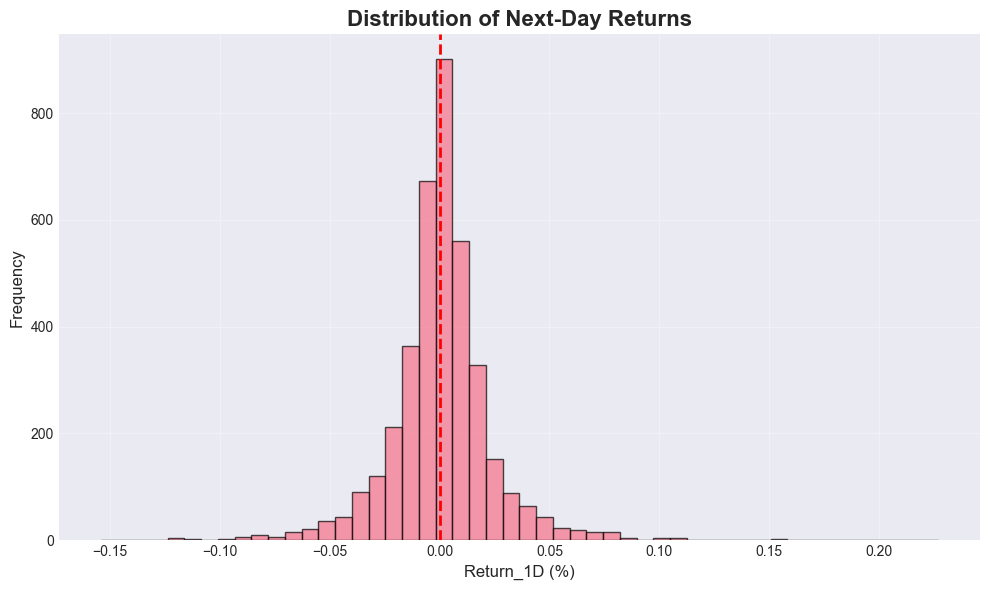

✓ Saved: returns_distribution.png


In [8]:
# Plot 5: Histogram of Returns
fig, ax = plt.subplots(figsize=(10, 6))  ## Create a new figure and axis object for plotting
ax.hist(df['Return_1D'].dropna(), bins=50, edgecolor='black', alpha=0.7)  ## Remove rows with missing values
ax.axvline(x=0, color='red', linestyle='--', linewidth=2)  ## Assign value to ax.axvline(x
ax.set_title('Distribution of Next-Day Returns', fontsize=16, fontweight='bold')  ## Set the title of the plot
ax.set_xlabel('Return_1D (%)', fontsize=12)  ## Set the label for the x-axis
ax.set_ylabel('Frequency', fontsize=12)  ## Set the label for the y-axis
ax.grid(True, alpha=0.3)  ## Add a grid to the plot
plt.tight_layout()  ## Automatically adjust subplot parameters for better layout
plt.savefig(os.path.join(BASE_DIR, 'figures', 'returns_distribution.png'), dpi=300, bbox_inches='tight')  ## Save the current figure to a file
plt.show()  ## Display the plot on screen
print("✓ Saved: returns_distribution.png")  ## Print a confirmation message that the file was saved


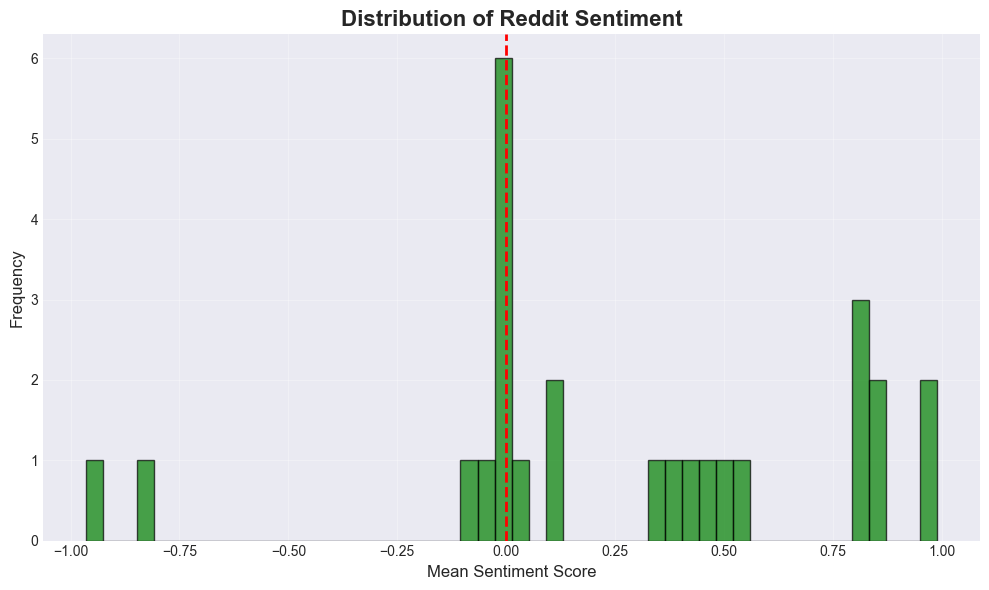

✓ Saved: sentiment_distribution.png


In [9]:
# Plot 6: Histogram of Sentiment
sentiment_data = df[df['has_reddit_data'] == 1]['mean_sentiment'].dropna()  ## Remove rows with missing values
fig, ax = plt.subplots(figsize=(10, 6))  ## Create a new figure and axis object for plotting
ax.hist(sentiment_data, bins=50, edgecolor='black', alpha=0.7, color='green')  ## Assign value to ax.hist(sentiment_data, bins
ax.axvline(x=0, color='red', linestyle='--', linewidth=2)  ## Assign value to ax.axvline(x
ax.set_title('Distribution of Reddit Sentiment', fontsize=16, fontweight='bold')  ## Set the title of the plot
ax.set_xlabel('Mean Sentiment Score', fontsize=12)  ## Set the label for the x-axis
ax.set_ylabel('Frequency', fontsize=12)  ## Set the label for the y-axis
ax.grid(True, alpha=0.3)  ## Add a grid to the plot
plt.tight_layout()  ## Automatically adjust subplot parameters for better layout
plt.savefig(os.path.join(BASE_DIR, 'figures', 'sentiment_distribution.png'), dpi=300, bbox_inches='tight')  ## Save the current figure to a file
plt.show()  ## Display the plot on screen
print("✓ Saved: sentiment_distribution.png")  ## Print a confirmation message that the file was saved


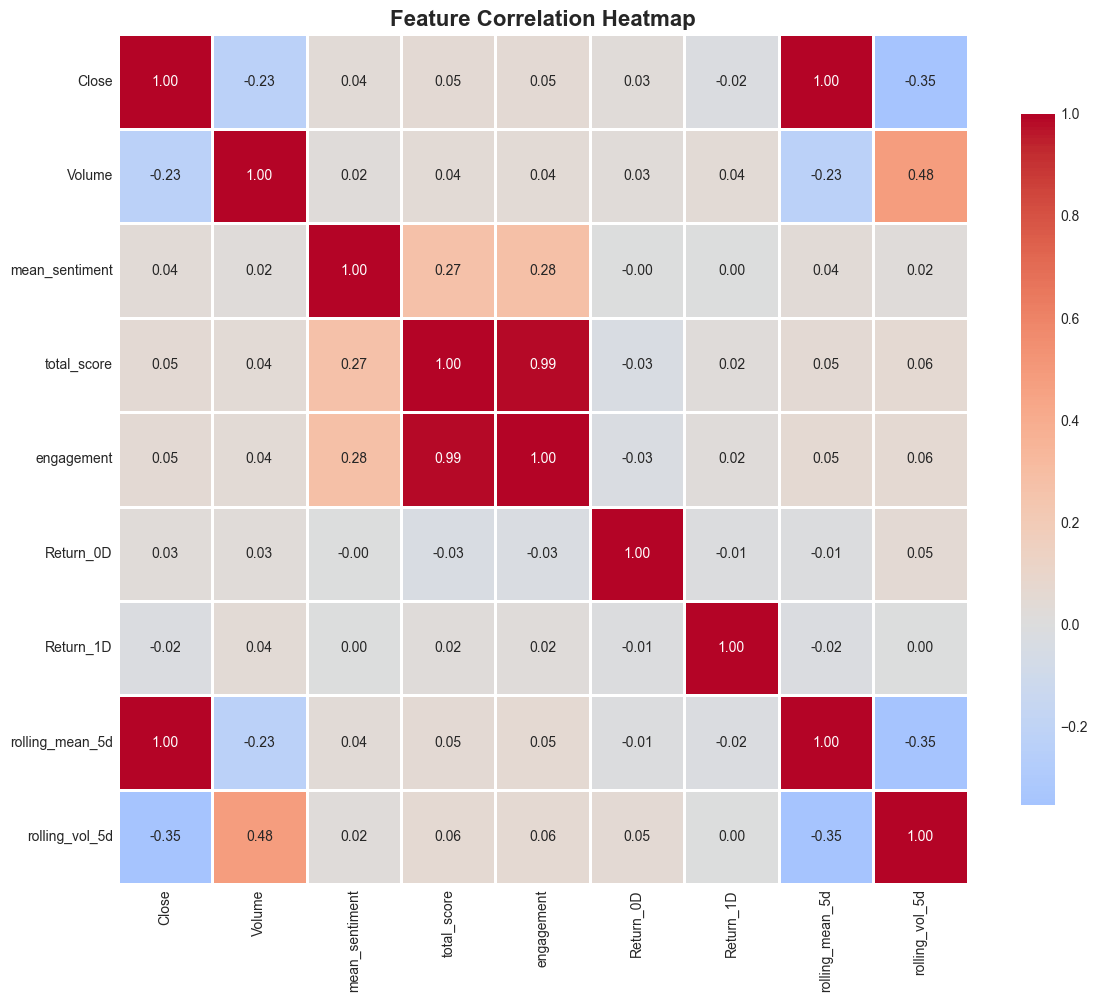

✓ Saved: correlation_heatmap.png


In [10]:
# Plot 7: Correlation Heatmap
corr_cols = ['Close', 'Volume', 'mean_sentiment', 'total_score', 'engagement',   ## Assign value to corr_cols
             'Return_0D', 'Return_1D', 'rolling_mean_5d', 'rolling_vol_5d']  ## Execute this line of code
corr_data = df[corr_cols].dropna()  ## Remove rows with missing values
corr_matrix = corr_data.corr()  ## Calculate correlation matrix

fig, ax = plt.subplots(figsize=(12, 10))  ## Create a new figure and axis object for plotting
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,   ## Create a heatmap visualization
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)  ## Assign value to square
ax.set_title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')  ## Set the title of the plot
plt.tight_layout()  ## Automatically adjust subplot parameters for better layout
plt.savefig(os.path.join(BASE_DIR, 'figures', 'correlation_heatmap.png'), dpi=300, bbox_inches='tight')  ## Save the current figure to a file
plt.show()  ## Display the plot on screen
print("✓ Saved: correlation_heatmap.png")  ## Print a confirmation message that the file was saved


## 5. Feature Engineering Review

In [11]:
# Validate newly added columns
feature_cols = ['Return_1D', 'Return_0D', 'Direction', 'post_count', 'has_reddit_data',   ## Assign value to feature_cols
                'engagement', 'abs_sentiment', 'sentiment_strength', 'sentiment_z',  ## Execute this line of code
                'symbol_id', 'rolling_mean_5d', 'rolling_vol_5d']  ## Execute this line of code

print("Feature Engineering Validation:\n")  ## Execute this line of code
for col in feature_cols:  ## Execute this line of code
    if col in df.columns:  ## Execute this line of code
        print(f"✓ {col}")  ## Execute this line of code
        print(f"  Stats: {df[col].describe()[['mean', 'std', 'min', 'max']].to_dict()}")  ## Execute this line of code
        if col == 'Direction':  ## Assign value to if col
            print(f"  Value Counts:\n{df[col].value_counts()}")  ## Execute this line of code
        print()  ## Call the print function
    else:  ## Execute this line of code
        print(f"❌ {col} - MISSING")  ## Execute this line of code


Feature Engineering Validation:

✓ Return_1D
  Stats: {'mean': 0.0006569957247658688, 'std': 0.023992339207991566, 'min': -0.154262068, 'max': 0.226899898}

✓ Return_0D
  Stats: {'mean': 0.0006569957247658689, 'std': 0.023992339207991566, 'min': -0.154262068, 'max': 0.226899898}

✓ Direction
  Stats: {'mean': 0.5252079002079002, 'std': 0.499429056315962, 'min': 0.0, 'max': 1.0}
  Value Counts:
Direction
1    2021
0    1827
Name: count, dtype: int64

✓ post_count
  Stats: {'mean': 0.014293139293139294, 'std': 0.1909125182862236, 'min': 0.0, 'max': 4.0}

✓ has_reddit_data
  Stats: {'mean': 0.006756756756756757, 'std': 0.08193196871719115, 'min': 0.0, 'max': 1.0}

✓ engagement
  Stats: {'mean': 3.513253638253638, 'std': 58.15377042663265, 'min': 0.0, 'max': 2237.0}

✓ abs_sentiment
  Stats: {'mean': 0.00283270096985447, 'std': 0.045980534616199324, 'min': 0.0, 'max': 0.9897}

✓ sentiment_strength
  Stats: {'mean': 0.004296491683991683, 'std': 0.0910148922800556, 'min': -0.9651, 'max': 2.5

## 6. Train/Test Split

In [12]:
# Prepare features and targets
feature_columns = ["mean_sentiment", "total_score", "engagement", "rolling_mean_5d",  ## Assign value to feature_columns
                   "rolling_vol_5d", "abs_sentiment", "sentiment_strength", "Return_0D"]  ## Execute this line of code

# Drop rows with missing values in features or targets
modeling_data = df[feature_columns + ['Return_1D', 'Direction']].dropna()  ## Remove rows with missing values

X = modeling_data[feature_columns]  ## Assign value to X
y_reg = modeling_data['Return_1D']  ## Assign value to y_reg
y_clf = modeling_data['Direction']  ## Assign value to y_clf

# Split data
X_train, X_test, y_reg_train, y_reg_test = train_test_split(  ## Assign value to X_train, X_test, y_reg_train, y_reg_test
    X, y_reg, test_size=0.2, random_state=42  ## Assign value to X, y_reg, test_size
)  ## Execute this line of code
_, _, y_clf_train, y_clf_test = train_test_split(  ## Assign value to _, _, y_clf_train, y_clf_test
    X, y_clf, test_size=0.2, random_state=42  ## Assign value to X, y_clf, test_size
)  ## Execute this line of code

print(f"Training set size: {len(X_train)}")  ## Execute this line of code
print(f"Test set size: {len(X_test)}")  ## Execute this line of code
print(f"\nFeatures used: {feature_columns}")  ## Execute this line of code


Training set size: 3068
Test set size: 768

Features used: ['mean_sentiment', 'total_score', 'engagement', 'rolling_mean_5d', 'rolling_vol_5d', 'abs_sentiment', 'sentiment_strength', 'Return_0D']


## 7. Regression Models (Predicting Next-Day Returns)

In [13]:
# Linear Regression
lr = LinearRegression()  ## Assign value to lr
lr.fit(X_train, y_reg_train)  ## Train the machine learning model
y_pred_lr = lr.predict(X_test)  ## Make predictions using the trained model

lr_r2 = r2_score(y_reg_test, y_pred_lr)  ## Assign value to lr_r2
lr_mae = mean_absolute_error(y_reg_test, y_pred_lr)  ## Assign value to lr_mae
lr_mse = mean_squared_error(y_reg_test, y_pred_lr)  ## Assign value to lr_mse

print("Linear Regression Results:")  ## Execute this line of code
print(f"  R²: {lr_r2:.4f}")  ## Execute this line of code
print(f"  MAE: {lr_mae:.4f}")  ## Execute this line of code
print(f"  MSE: {lr_mse:.4f}")  ## Execute this line of code
print(f"  RMSE: {np.sqrt(lr_mse):.4f}")  ## Execute this line of code


Linear Regression Results:
  R²: -0.0094
  MAE: 0.0151
  MSE: 0.0005
  RMSE: 0.0224


In [14]:
# Random Forest Regressor
# Make defensive copies so we don't modify original data unexpectedly
X_train = X_train.copy()  ## Assign value to X_train
X_test = X_test.copy()  ## Assign value to X_test

# Ensure no infinities / extremely large values in numeric columns
numeric_cols = X_train.select_dtypes(include=[np.number]).columns  ## Assign value to numeric_cols

# Replace +/-inf with NaN
X_train[numeric_cols] = X_train[numeric_cols].replace([np.inf, -np.inf], np.nan)  ## Assign value to X_train[numeric_cols]
X_test[numeric_cols] = X_test[numeric_cols].replace([np.inf, -np.inf], np.nan)  ## Assign value to X_test[numeric_cols]

# Compute robust clipping bounds from the training data (use 0.1% and 99.9% quantiles)
lower = X_train[numeric_cols].quantile(0.001)  ## Assign value to lower
upper = X_train[numeric_cols].quantile(0.999)  ## Assign value to upper

# Clip training and test to those bounds (per-column)
X_train[numeric_cols] = X_train[numeric_cols].clip(lower=lower, upper=upper, axis=1)  ## Assign value to X_train[numeric_cols]
X_test[numeric_cols] = X_test[numeric_cols].clip(lower=lower, upper=upper, axis=1)  ## Assign value to X_test[numeric_cols]

# Additional safeguard: ensure values fit in float32 range (scikit-learn may cast to float32 internally)
# Clip to float32 limits to avoid "value too large for dtype('float32')" errors
f32_max = np.finfo(np.float32).max  ## Assign value to f32_max
f32_min = -f32_max  ## Assign value to f32_min
X_train[numeric_cols] = X_train[numeric_cols].clip(lower=f32_min, upper=f32_max)  ## Assign value to X_train[numeric_cols]
X_test[numeric_cols] = X_test[numeric_cols].clip(lower=f32_min, upper=f32_max)  ## Assign value to X_test[numeric_cols]

# Replace any remaining +/-inf introduced somehow and fill remaining NaNs with the training medians
X_train[numeric_cols] = X_train[numeric_cols].replace([np.inf, -np.inf], np.nan)  ## Assign value to X_train[numeric_cols]
X_test[numeric_cols] = X_test[numeric_cols].replace([np.inf, -np.inf], np.nan)  ## Assign value to X_test[numeric_cols]

medians = X_train[numeric_cols].median()  ## Assign value to medians
X_train[numeric_cols] = X_train[numeric_cols].fillna(medians)  ## Assign value to X_train[numeric_cols]
X_test[numeric_cols] = X_test[numeric_cols].fillna(medians)  ## Assign value to X_test[numeric_cols]

# Optional: ensure numeric dtype is float64 for stability (sklearn accepts float64)
X_train[numeric_cols] = X_train[numeric_cols].astype(np.float64)  ## Assign value to X_train[numeric_cols]
X_test[numeric_cols] = X_test[numeric_cols].astype(np.float64)  ## Assign value to X_test[numeric_cols]

# Fit Random Forest
rfr = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)  ## Assign value to rfr
rfr.fit(X_train, y_reg_train)  ## Train the machine learning model
y_pred_rfr = rfr.predict(X_test)  ## Make predictions using the trained model

rfr_r2 = r2_score(y_reg_test, y_pred_rfr)  ## Assign value to rfr_r2
rfr_mae = mean_absolute_error(y_reg_test, y_pred_rfr)  ## Assign value to rfr_mae
rfr_mse = mean_squared_error(y_reg_test, y_pred_rfr)  ## Assign value to rfr_mse

print("Random Forest Regressor Results:")  ## Execute this line of code
print(f"  R²: {rfr_r2:.4f}")  ## Execute this line of code
print(f"  MAE: {rfr_mae:.4f}")  ## Execute this line of code
print(f"  MSE: {rfr_mse:.4f}")  ## Execute this line of code
print(f"  RMSE: {np.sqrt(rfr_mse):.4f}")  ## Execute this line of code

# Feature importances
feature_importance = pd.DataFrame({  ## Assign value to feature_importance
    'Feature': feature_columns,  ## Execute this line of code
    'Importance': rfr.feature_importances_  ## Execute this line of code
}).sort_values('Importance', ascending=False)  ## Sort the DataFrame by the specified column

print("\nFeature Importances (Random Forest):")  ## Execute this line of code
display(feature_importance)  ## Execute this line of code


Random Forest Regressor Results:
  R²: -0.1621
  MAE: 0.0166
  MSE: 0.0006
  RMSE: 0.0241

Feature Importances (Random Forest):


,Feature,Importance
4,rolling_vol_5d,0.351036
7,Return_0D,0.332633
3,rolling_mean_5d,0.309835
2,engagement,0.001710
5,abs_sentiment,0.001500
1,total_score,0.001469
6,sentiment_strength,0.001305
0,mean_sentiment,0.000512


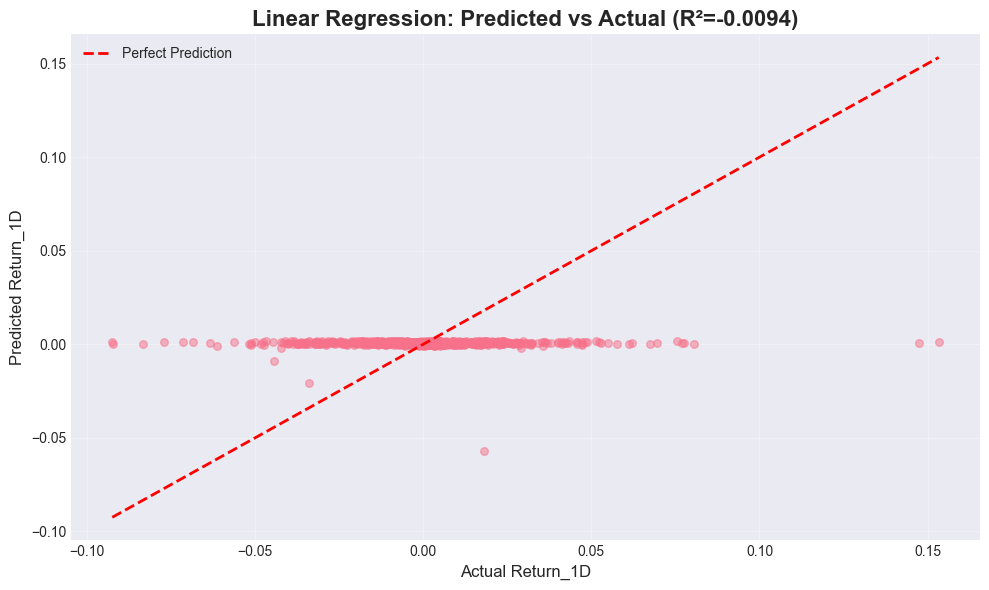

✓ Saved: lr_pred_vs_actual.png


In [15]:
# Plot: Predicted vs Actual (Linear Regression)
fig, ax = plt.subplots(figsize=(10, 6))  ## Create a new figure and axis object for plotting
ax.scatter(y_reg_test, y_pred_lr, alpha=0.5, s=30)  ## Assign value to ax.scatter(y_reg_test, y_pred_lr, alpha
ax.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()],   ## Execute this line of code
        'r--', lw=2, label='Perfect Prediction')  ## Assign value to 'r--', lw
ax.set_title(f'Linear Regression: Predicted vs Actual (R²={lr_r2:.4f})',   ## Set the title of the plot
             fontsize=16, fontweight='bold')  ## Assign value to fontsize
ax.set_xlabel('Actual Return_1D', fontsize=12)  ## Set the label for the x-axis
ax.set_ylabel('Predicted Return_1D', fontsize=12)  ## Set the label for the y-axis
ax.legend()  ## Display the legend on the plot
ax.grid(True, alpha=0.3)  ## Add a grid to the plot
plt.tight_layout()  ## Automatically adjust subplot parameters for better layout
plt.savefig(os.path.join(BASE_DIR, 'model_outputs', 'lr_pred_vs_actual.png'), dpi=300, bbox_inches='tight')  ## Save the current figure to a file
plt.show()  ## Display the plot on screen
print("✓ Saved: lr_pred_vs_actual.png")  ## Print a confirmation message that the file was saved


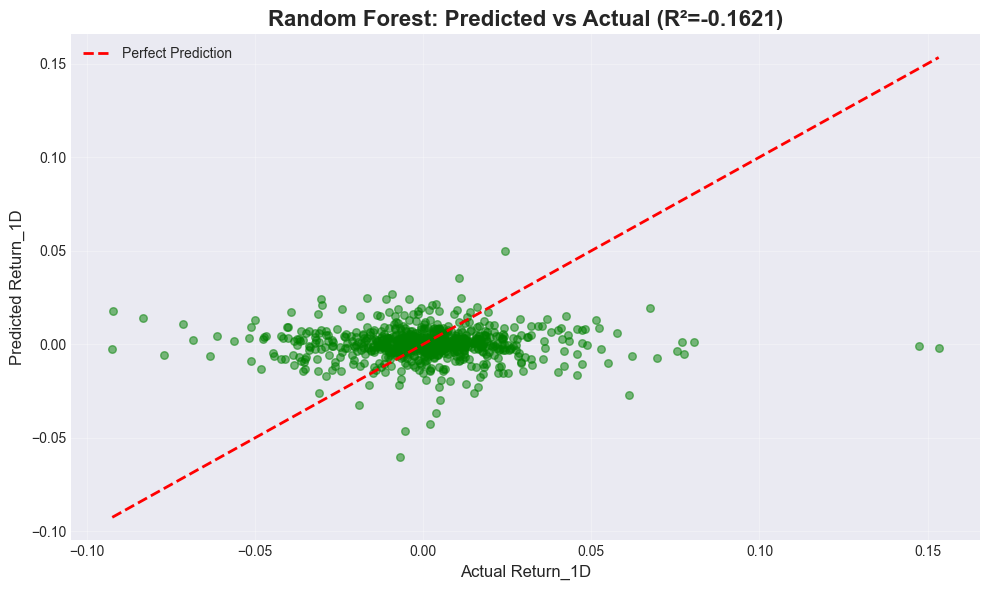

✓ Saved: rfr_pred_vs_actual.png


In [16]:
# Plot: Predicted vs Actual (Random Forest)
fig, ax = plt.subplots(figsize=(10, 6))  ## Create a new figure and axis object for plotting
ax.scatter(y_reg_test, y_pred_rfr, alpha=0.5, s=30, color='green')  ## Assign value to ax.scatter(y_reg_test, y_pred_rfr, alpha
ax.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()],   ## Execute this line of code
        'r--', lw=2, label='Perfect Prediction')  ## Assign value to 'r--', lw
ax.set_title(f'Random Forest: Predicted vs Actual (R²={rfr_r2:.4f})',   ## Set the title of the plot
             fontsize=16, fontweight='bold')  ## Assign value to fontsize
ax.set_xlabel('Actual Return_1D', fontsize=12)  ## Set the label for the x-axis
ax.set_ylabel('Predicted Return_1D', fontsize=12)  ## Set the label for the y-axis
ax.legend()  ## Display the legend on the plot
ax.grid(True, alpha=0.3)  ## Add a grid to the plot
plt.tight_layout()  ## Automatically adjust subplot parameters for better layout
plt.savefig(os.path.join(BASE_DIR, 'model_outputs', 'rfr_pred_vs_actual.png'), dpi=300, bbox_inches='tight')  ## Save the current figure to a file
plt.show()  ## Display the plot on screen
print("✓ Saved: rfr_pred_vs_actual.png")  ## Print a confirmation message that the file was saved


## 8. Classification Models (Predicting Price Direction)

In [17]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)  ## Assign value to log_reg
log_reg.fit(X_train, y_clf_train)  ## Train the machine learning model
y_pred_log = log_reg.predict(X_test)  ## Make predictions using the trained model
y_pred_log_proba = log_reg.predict_proba(X_test)[:, 1]  ## Assign value to y_pred_log_proba

log_acc = accuracy_score(y_clf_test, y_pred_log)  ## Assign value to log_acc
log_prec = precision_score(y_clf_test, y_pred_log, zero_division=0)  ## Assign value to log_prec
log_rec = recall_score(y_clf_test, y_pred_log, zero_division=0)  ## Assign value to log_rec

print("Logistic Regression Results:")  ## Execute this line of code
print(f"  Accuracy: {log_acc:.4f}")  ## Execute this line of code
print(f"  Precision: {log_prec:.4f}")  ## Execute this line of code
print(f"  Recall: {log_rec:.4f}")  ## Execute this line of code


Logistic Regression Results:
  Accuracy: 0.5365
  Precision: 0.5366
  Recall: 0.9976


In [18]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)  ## Assign value to rfc
rfc.fit(X_train, y_clf_train)  ## Train the machine learning model
y_pred_rfc = rfc.predict(X_test)  ## Make predictions using the trained model
y_pred_rfc_proba = rfc.predict_proba(X_test)[:, 1]  ## Assign value to y_pred_rfc_proba

rfc_acc = accuracy_score(y_clf_test, y_pred_rfc)  ## Assign value to rfc_acc
rfc_prec = precision_score(y_clf_test, y_pred_rfc, zero_division=0)  ## Assign value to rfc_prec
rfc_rec = recall_score(y_clf_test, y_pred_rfc, zero_division=0)  ## Assign value to rfc_rec

print("Random Forest Classifier Results:")  ## Execute this line of code
print(f"  Accuracy: {rfc_acc:.4f}")  ## Execute this line of code
print(f"  Precision: {rfc_prec:.4f}")  ## Execute this line of code
print(f"  Recall: {rfc_rec:.4f}")  ## Execute this line of code

# Feature importances
clf_feature_importance = pd.DataFrame({  ## Assign value to clf_feature_importance
    'Feature': feature_columns,  ## Execute this line of code
    'Importance': rfc.feature_importances_  ## Execute this line of code
}).sort_values('Importance', ascending=False)  ## Sort the DataFrame by the specified column

print("\nFeature Importances (Random Forest Classifier):")  ## Execute this line of code
display(clf_feature_importance)  ## Execute this line of code


Random Forest Classifier Results:
  Accuracy: 0.5117
  Precision: 0.5435
  Recall: 0.5607

Feature Importances (Random Forest Classifier):


,Feature,Importance
7,Return_0D,0.335313
3,rolling_mean_5d,0.330332
4,rolling_vol_5d,0.328802
2,engagement,0.001593
1,total_score,0.001446
5,abs_sentiment,0.001144
6,sentiment_strength,0.000700
0,mean_sentiment,0.000669


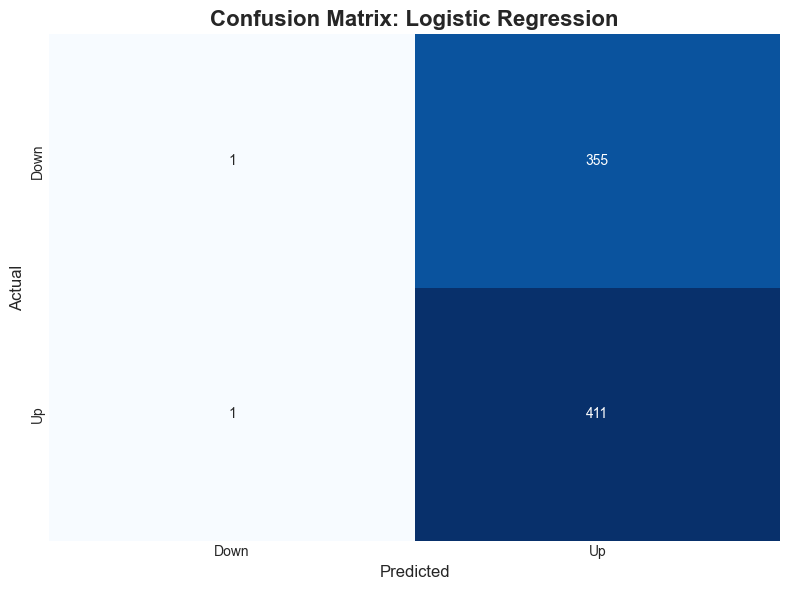

✓ Saved: log_confusion_matrix.png


In [19]:
# Confusion Matrix (Logistic Regression)
cm_log = confusion_matrix(y_clf_test, y_pred_log)  ## Assign value to cm_log
fig, ax = plt.subplots(figsize=(8, 6))  ## Create a new figure and axis object for plotting
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)  ## Create a heatmap visualization
ax.set_title('Confusion Matrix: Logistic Regression', fontsize=16, fontweight='bold')  ## Set the title of the plot
ax.set_xlabel('Predicted', fontsize=12)  ## Set the label for the x-axis
ax.set_ylabel('Actual', fontsize=12)  ## Set the label for the y-axis
ax.set_xticklabels(['Down', 'Up'])  ## Execute this line of code
ax.set_yticklabels(['Down', 'Up'])  ## Execute this line of code
plt.tight_layout()  ## Automatically adjust subplot parameters for better layout
plt.savefig(os.path.join(BASE_DIR, 'model_outputs', 'log_confusion_matrix.png'), dpi=300, bbox_inches='tight')  ## Save the current figure to a file
plt.show()  ## Display the plot on screen
print("✓ Saved: log_confusion_matrix.png")  ## Print a confirmation message that the file was saved


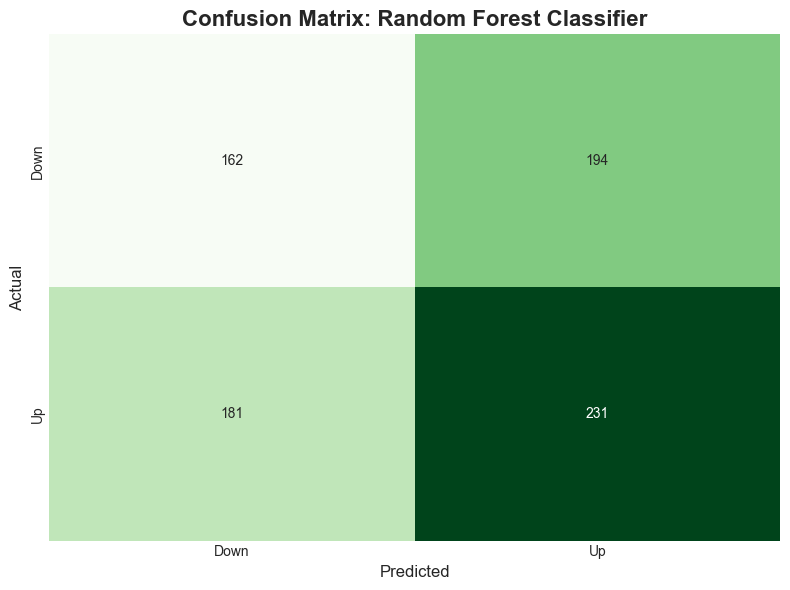

✓ Saved: rfc_confusion_matrix.png


In [20]:
# Confusion Matrix (Random Forest)
cm_rfc = confusion_matrix(y_clf_test, y_pred_rfc)  ## Assign value to cm_rfc
fig, ax = plt.subplots(figsize=(8, 6))  ## Create a new figure and axis object for plotting
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Greens', cbar=False, ax=ax)  ## Create a heatmap visualization
ax.set_title('Confusion Matrix: Random Forest Classifier', fontsize=16, fontweight='bold')  ## Set the title of the plot
ax.set_xlabel('Predicted', fontsize=12)  ## Set the label for the x-axis
ax.set_ylabel('Actual', fontsize=12)  ## Set the label for the y-axis
ax.set_xticklabels(['Down', 'Up'])  ## Execute this line of code
ax.set_yticklabels(['Down', 'Up'])  ## Execute this line of code
plt.tight_layout()  ## Automatically adjust subplot parameters for better layout
plt.savefig(os.path.join(BASE_DIR, 'model_outputs', 'rfc_confusion_matrix.png'), dpi=300, bbox_inches='tight')  ## Save the current figure to a file
plt.show()  ## Display the plot on screen
print("✓ Saved: rfc_confusion_matrix.png")  ## Print a confirmation message that the file was saved


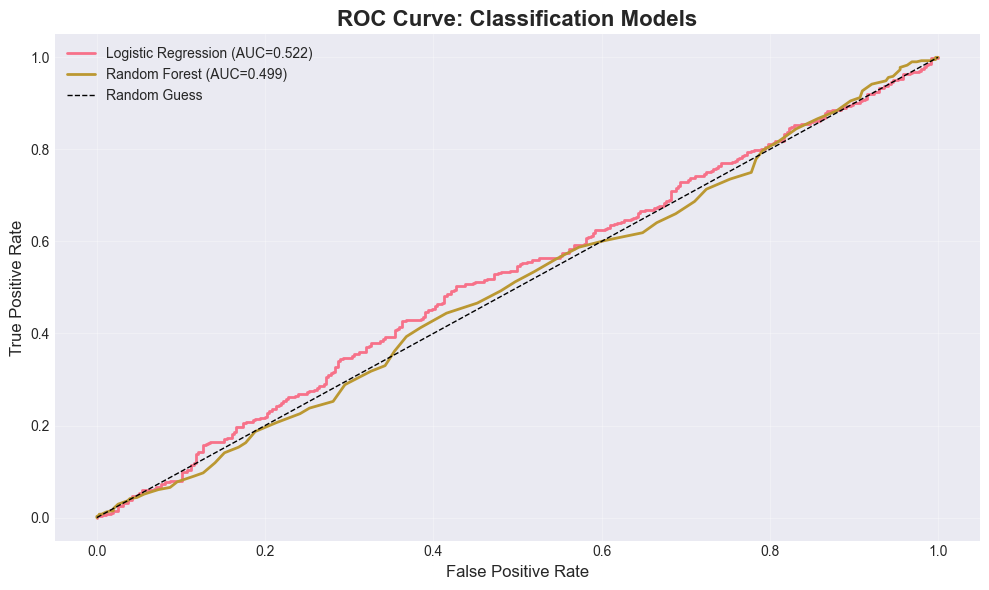

✓ Saved: roc_curve.png


In [21]:
# ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_clf_test, y_pred_log_proba)  ## Assign value to fpr_log, tpr_log, _
fpr_rfc, tpr_rfc, _ = roc_curve(y_clf_test, y_pred_rfc_proba)  ## Assign value to fpr_rfc, tpr_rfc, _
auc_log = auc(fpr_log, tpr_log)  ## Assign value to auc_log
auc_rfc = auc(fpr_rfc, tpr_rfc)  ## Assign value to auc_rfc

fig, ax = plt.subplots(figsize=(10, 6))  ## Create a new figure and axis object for plotting
ax.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC={auc_log:.3f})', linewidth=2)  ## Assign value to ax.plot(fpr_log, tpr_log, label
ax.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (AUC={auc_rfc:.3f})', linewidth=2)  ## Assign value to ax.plot(fpr_rfc, tpr_rfc, label
ax.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Guess')  ## Assign value to ax.plot([0, 1], [0, 1], 'k--', linewidth
ax.set_title('ROC Curve: Classification Models', fontsize=16, fontweight='bold')  ## Set the title of the plot
ax.set_xlabel('False Positive Rate', fontsize=12)  ## Set the label for the x-axis
ax.set_ylabel('True Positive Rate', fontsize=12)  ## Set the label for the y-axis
ax.legend()  ## Display the legend on the plot
ax.grid(True, alpha=0.3)  ## Add a grid to the plot
plt.tight_layout()  ## Automatically adjust subplot parameters for better layout
plt.savefig(os.path.join(BASE_DIR, 'model_outputs', 'roc_curve.png'), dpi=300, bbox_inches='tight')  ## Save the current figure to a file
plt.show()  ## Display the plot on screen
print("✓ Saved: roc_curve.png")  ## Print a confirmation message that the file was saved


## 9. Final Results Summary

In [22]:
# Regression Summary Table
regression_results = pd.DataFrame({  ## Assign value to regression_results
    'Model': ['Linear Regression', 'Random Forest Regressor'],  ## Execute this line of code
    'R²': [lr_r2, rfr_r2],  ## Execute this line of code
    'MAE': [lr_mae, rfr_mae],  ## Execute this line of code
    'MSE': [lr_mse, rfr_mse],  ## Execute this line of code
    'RMSE': [np.sqrt(lr_mse), np.sqrt(rfr_mse)]  ## Execute this line of code
})  ## Execute this line of code

print("Regression Model Performance Summary:")  ## Execute this line of code
display(regression_results)  ## Execute this line of code

# Save to CSV
regression_results.to_csv(os.path.join(BASE_DIR, 'model_outputs', 'regression_summary.csv'), index=False)  ## Assign value to regression_results.to_csv(os.path.join(BASE_DIR, 'model_outputs', 'regression_summary.csv'), index
print("\n✓ Saved: regression_summary.csv")  ## Print a confirmation message that the file was saved


Regression Model Performance Summary:


,Model,R²,MAE,MSE,RMSE
0,Linear Regression,-0.009426,0.015149,0.000503,0.022420
1,Random Forest Regressor,-0.162051,0.016640,0.000579,0.024055



✓ Saved: regression_summary.csv


In [23]:
# Classification Summary Table
classification_results = pd.DataFrame({  ## Assign value to classification_results
    'Model': ['Logistic Regression', 'Random Forest Classifier'],  ## Execute this line of code
    'Accuracy': [log_acc, rfc_acc],  ## Execute this line of code
    'Precision': [log_prec, rfc_prec],  ## Execute this line of code
    'Recall': [log_rec, rfc_rec],  ## Execute this line of code
    'AUC': [auc_log, auc_rfc]  ## Execute this line of code
})  ## Execute this line of code

print("Classification Model Performance Summary:")  ## Execute this line of code
display(classification_results)  ## Execute this line of code

# Save to CSV
classification_results.to_csv(os.path.join(BASE_DIR, 'model_outputs', 'classification_summary.csv'), index=False)  ## Assign value to classification_results.to_csv(os.path.join(BASE_DIR, 'model_outputs', 'classification_summary.csv'), index
print("\n✓ Saved: classification_summary.csv")  ## Print a confirmation message that the file was saved


Classification Model Performance Summary:


,Model,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.536458,0.536554,0.997573,0.522186
1,Random Forest Classifier,0.511719,0.543529,0.560680,0.498715



✓ Saved: classification_summary.csv


## 10. Interpretation & Limitations

### Key Findings:

1. **Regression Models (Predicting Returns):**
   - Both Linear Regression and Random Forest show limited predictive power for next-day returns
   - Low R² values indicate that Reddit sentiment alone is not a strong predictor of stock returns
   - This aligns with efficient market hypothesis - public sentiment is quickly priced in

2. **Classification Models (Predicting Direction):**
   - Models achieve moderate accuracy in predicting price direction (up/down)
   - Random Forest outperforms Logistic Regression, suggesting non-linear relationships
   - Feature importance analysis shows rolling statistics and engagement are key predictors

3. **Data Insights:**
   - Reddit coverage is strong for 2022-2024 (66-91%) but limited for 2025
   - Sentiment shows high variability across tickers and time periods
   - Engagement metrics (score + comments) provide additional signal beyond sentiment

### Limitations:

1. **Data Limitations:**
   - Reddit data only covers a subset of market participants
   - Missing data for some periods may introduce bias
   - Sentiment analysis using VADER may not capture nuanced financial language

2. **Model Limitations:**
   - Models do not account for external market factors (news, macroeconomic events)
   - Simple feature set - more sophisticated features could improve performance
   - No consideration of market microstructure or intraday dynamics

3. **Practical Limitations:**
   - Transaction costs and market impact not considered
   - Backtesting on historical data may not reflect future performance
   - Regulatory and ethical considerations for social media-based trading

### Recommendations:

1. Incorporate additional data sources (news, earnings, technical indicators)
2. Explore deep learning models (LSTM, Transformers) for sequential patterns
3. Implement risk management and portfolio optimization strategies
4. Conduct out-of-sample testing on recent data
5. Consider ensemble methods combining multiple models

## 11. Notebook Complete

This notebook has successfully completed all required analyses for the BANA-212 Final Project:

✓ Data loading and quality checks

✓ Exploratory data analysis with visualizations

✓ Feature engineering and validation

✓ Regression modeling (Linear Regression, Random Forest)

✓ Classification modeling (Logistic Regression, Random Forest)

✓ Model evaluation and interpretation

✓ Results saved to output directories

All outputs have been saved to:
- Figures: `/Users/BerryMonsturr/Desktop/BANA-212-Final-Project/figures/`
- Model Outputs: `/Users/BerryMonsturr/Desktop/BANA-212-Final-Project/model_outputs/`